In [88]:
import pandas as pd
import numpy as np
import plotly_express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype"
from sklearn.metrics import classification_report

In [89]:
df1 = pd.read_csv(r"C:\Users\karki\OneDrive\Desktop\GitHub_repo\fraudTest.csv")
df2 = pd.read_csv(r"C:\Users\karki\OneDrive\Desktop\GitHub_repo\fraudTrain.csv")

In [90]:
df2.shape

(1296675, 23)

In [91]:
df2.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [92]:
df2.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [93]:
df2.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [94]:
df2.drop_duplicates(inplace = True)
df1.drop_duplicates(inplace = True)

In [95]:
df1.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time',"city"],inplace=True)
df2.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time',"city"],inplace=True)

In [96]:
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0


In [97]:
df2.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
gender                    object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [98]:
df2["trans_date_trans_time"] = pd.to_datetime(df2['trans_date_trans_time'])
df1["trans_date_trans_time"] = pd.to_datetime(df1['trans_date_trans_time'])

In [99]:
df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0


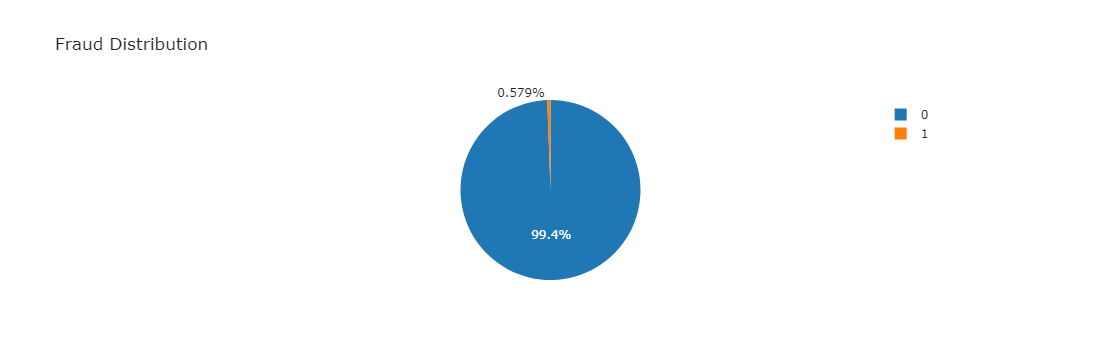

In [100]:
fraud_counts = df2["is_fraud"].value_counts()
fig = px.pie(values=fraud_counts, names=fraud_counts.index, title='Fraud Distribution', template= "simple_white")
fig.show()

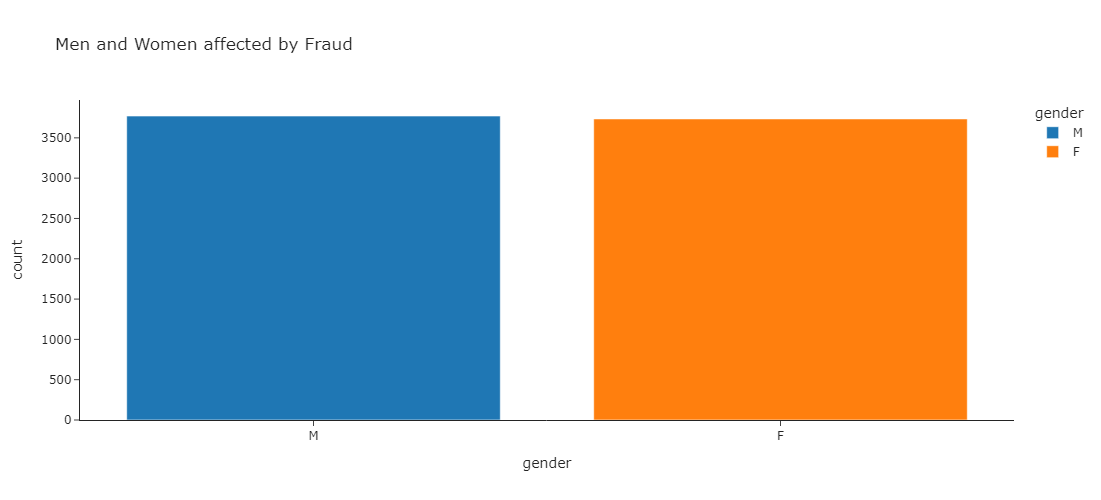

In [118]:
import plotly.express as px
fraud_df = df2[df2["is_fraud"] == 1]
px.histogram(x=fraud_df["gender"], template="simple_white", title="Men and Women affected by Fraud", data_frame= fraud_df, color= "gender", height = 500)

We do not see a clear difference between both genders. Data seem to suggest that females and males are almost equally susceptible (50%) to transaction fraud. Gender is not very indicative of a fraudulent transaction.

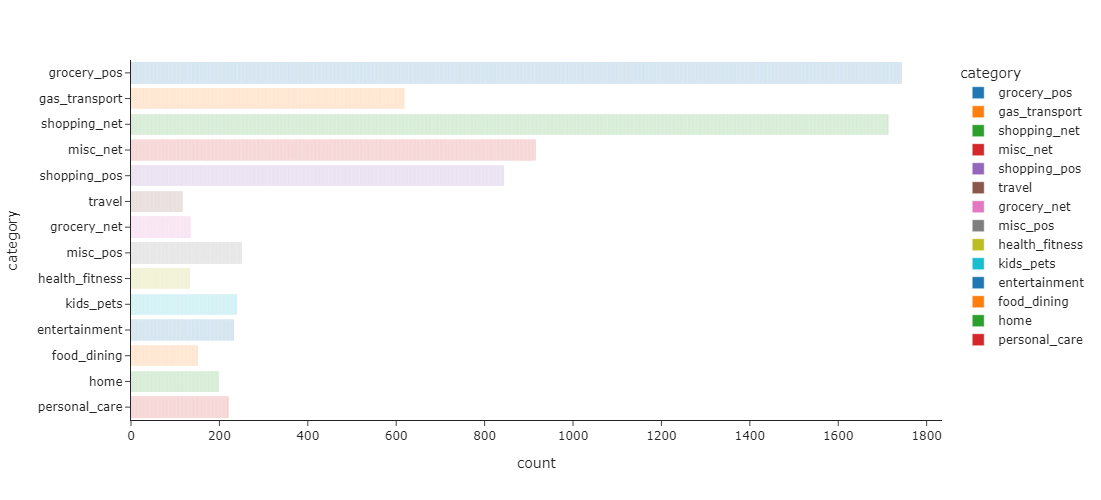

In [117]:
fraud_df = df2[df2["is_fraud"] == 1]
px.bar(y= fraud_df["category"], template="simple_white", data_frame= fraud_df, color ="category", height = 500)

Spending categories indeed see more fraud than others. Fraud tends to happen more often in 'Shopping_net', 'Grocery_pos', and 'misc_net' while 'home' and 'kids_pets' among others tend to see more normal transactions than fraudulent ones.

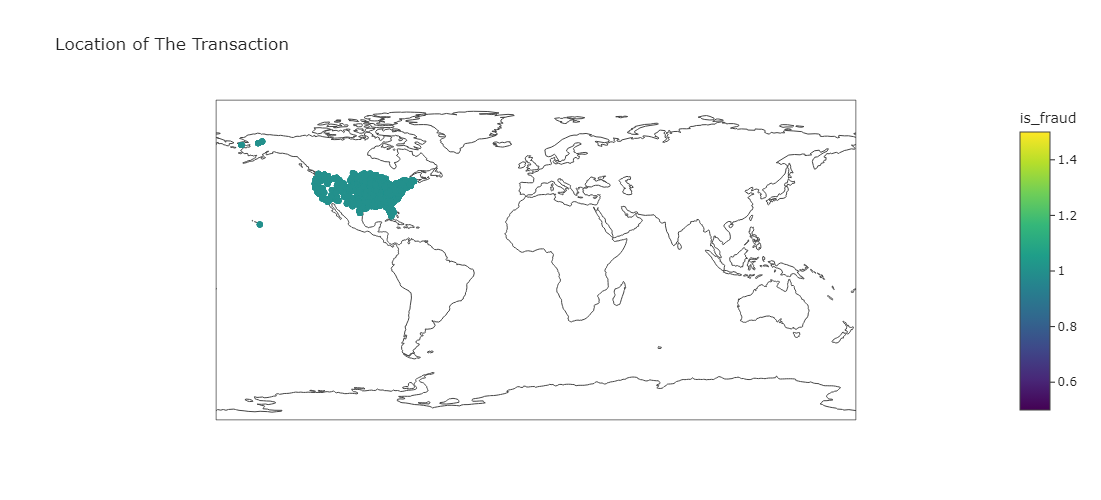

In [116]:
fraud_df = df2[df2["is_fraud"] == 1]
px.scatter_geo(data_frame=fraud_df,
               lat= "lat", 
               lon="long", 
               title= "Location of The Transaction", 
               color= "is_fraud", 
               template="simple_white", height= 500)

The above map shows that most of the Fraud transaction that has happend is in the USA, some of the Fraud Transaction we can see happening is in Canada, Alsaka and also some of them in Hawaii island too.

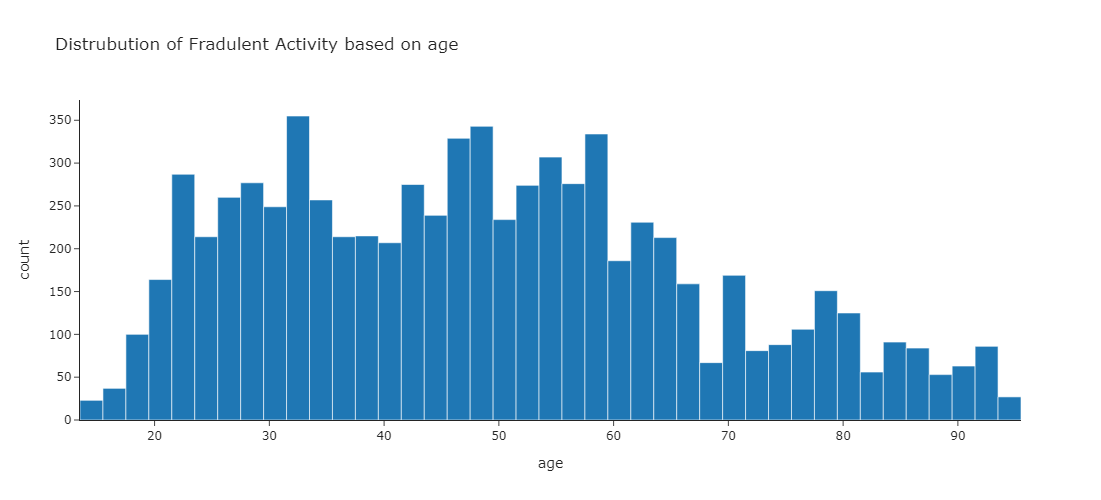

In [115]:
df2["age"] = pd.DatetimeIndex(df2["trans_date_trans_time"]).year - pd.DatetimeIndex(df2["dob"]).year
df1["age"] = pd.DatetimeIndex(df1["trans_date_trans_time"]).year - pd.DatetimeIndex(df1["dob"]).year
fraud_df = df2[df2["is_fraud"] == 1]
px.histogram(data_frame=fraud_df, x="age", title="Distrubution of Fradulent Activity based on age", template="simple_white", height= 500)

As we can see that people in from the 20's to 60s are most affected by the Fraud transaction also we see 

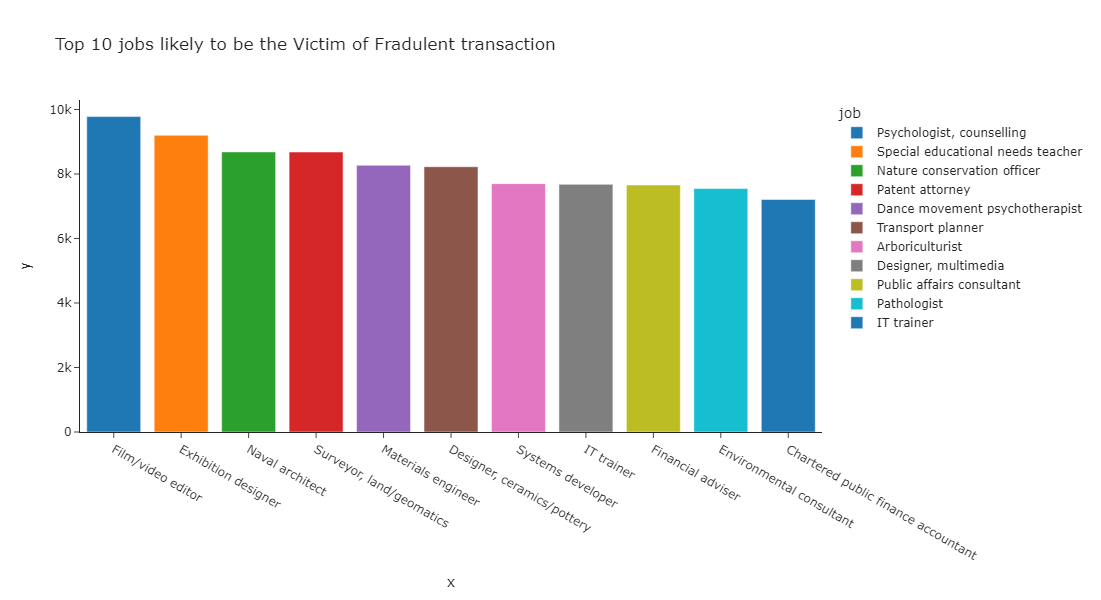

In [114]:
#Just plotting the top ten jobs that are more susceptible to fraudulent transactions.
#top_jobs = df2["job"].value_counts()
#print(top_jobs[: 10])
y = df2["job"].value_counts().values[:11]
x = df2["job"].value_counts().index[:11]
px.bar(x = x, y = y, data_frame= df2[:11], color="job", template="simple_white", 
       title="Top 10 jobs likely to be the Victim of Fradulent transaction",
          height= 600)

# Feature Encoding

In [19]:
df2['hour'] = df2['trans_date_trans_time'].dt.hour
df2['day'] = df2['trans_date_trans_time'].dt.day
df2['day_of_week'] = df2['trans_date_trans_time'].dt.dayofweek 
df2['month'] = df2['trans_date_trans_time'].dt.month
df2['quarter'] = df2['trans_date_trans_time'].dt.quarter

df1['hour'] = df1['trans_date_trans_time'].dt.hour
df1['day'] = df1['trans_date_trans_time'].dt.day
df1['day_of_week'] = df1['trans_date_trans_time'].dt.dayofweek 
df1['month'] = df1['trans_date_trans_time'].dt.month
df1['quarter'] = df1['trans_date_trans_time'].dt.quarter

df2.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,...,dob,merch_lat,merch_long,is_fraud,age,hour,day,day_of_week,month,quarter
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,36.0788,-81.1781,3495,...,1988-03-09,36.011293,-82.048315,0,31,0,1,1,1,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149,...,1978-06-21,49.159047,-118.186462,0,41,0,1,1,1,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,83252,42.1808,-112.2620,4154,...,1962-01-19,43.150704,-112.154481,0,57,0,1,1,1,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,1939,...,1967-01-12,47.034331,-112.561071,0,52,0,1,1,1,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,24433,38.4207,-79.4629,99,...,1986-03-28,38.674999,-78.632459,0,33,0,1,1,1,1


In [20]:
df2.drop(['trans_date_trans_time','dob'],axis=1, inplace=True)
df1.drop(['trans_date_trans_time','dob'],axis=1, inplace= True)

df2["merchant"] = df2["merchant"].str.removeprefix("fraud_")
df1["merchant"] = df1["merchant"].str.removeprefix("fraud_")

In [21]:
fraud_df["cc_num"]

2449          4613314721966
2472        340187018810220
2523        340187018810220
2546          4613314721966
2553        340187018810220
                 ...       
1295399    3524574586339330
1295491    3524574586339330
1295532    4005676619255478
1295666    3560725013359375
1295733    4005676619255478
Name: cc_num, Length: 7506, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

lable_encoder = LabelEncoder()

df2['job'] = lable_encoder.fit_transform(df2['job'])
df2['category'] = lable_encoder.fit_transform(df2['category'])
df2['merchant'] = lable_encoder.fit_transform(df2['merchant'])

df1['job'] = lable_encoder.fit_transform(df1['job'])
df1['category'] = lable_encoder.fit_transform(df1['category'])
df1['merchant'] = lable_encoder.fit_transform(df1['merchant'])

In [23]:
df2.head()

,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,hour,day,day_of_week,month,quarter
0,2703186189652095,514,8,4.97,F,28654,36.0788,-81.1781,3495,370,36.011293,-82.048315,0,31,0,1,1,1,1
1,630423337322,241,4,107.23,F,99160,48.8878,-118.2105,149,428,49.159047,-118.186462,0,41,0,1,1,1,1
2,38859492057661,390,0,220.11,M,83252,42.1808,-112.2620,4154,307,43.150704,-112.154481,0,57,0,1,1,1,1
3,3534093764340240,360,2,45.00,M,59632,46.2306,-112.1138,1939,328,47.034331,-112.561071,0,52,0,1,1,1,1
4,375534208663984,297,9,41.96,M,24433,38.4207,-79.4629,99,116,38.674999,-78.632459,0,33,0,1,1,1,1


In [24]:
df2 = pd.get_dummies(df2, columns=['gender'], prefix='gender',  dtype= int)
df1 = pd.get_dummies(df1, columns=['gender'], prefix='gender',  dtype=int)

In [25]:
df2.head()

,cc_num,merchant,category,amt,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,hour,day,day_of_week,month,quarter,gender_F,gender_M
0,2703186189652095,514,8,4.97,28654,36.0788,-81.1781,3495,370,36.011293,-82.048315,0,31,0,1,1,1,1,1,0
1,630423337322,241,4,107.23,99160,48.8878,-118.2105,149,428,49.159047,-118.186462,0,41,0,1,1,1,1,1,0
2,38859492057661,390,0,220.11,83252,42.1808,-112.2620,4154,307,43.150704,-112.154481,0,57,0,1,1,1,1,0,1
3,3534093764340240,360,2,45.00,59632,46.2306,-112.1138,1939,328,47.034331,-112.561071,0,52,0,1,1,1,1,0,1
4,375534208663984,297,9,41.96,24433,38.4207,-79.4629,99,116,38.674999,-78.632459,0,33,0,1,1,1,1,0,1


In [26]:
df1.head()

,cc_num,merchant,category,amt,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age,hour,day,day_of_week,month,quarter,gender_F,gender_M
0,2291163933867244,319,10,2.86,29209,33.9659,-80.9355,333497,275,33.986391,-81.200714,0,52,12,21,6,6,2,0,1
1,3573030041201292,591,10,29.84,84002,40.3207,-110.4360,302,392,39.450498,-109.960431,0,30,12,21,6,6,2,1,0
2,3598215285024754,611,5,41.28,11710,40.6729,-73.5365,34496,259,40.495810,-74.196111,0,50,12,21,6,6,2,1,0
3,3591919803438423,222,9,60.05,32780,28.5697,-80.8191,54767,407,28.812398,-80.883061,0,33,12,21,6,6,2,0,1
4,3526826139003047,292,13,3.19,49632,44.2529,-85.0170,1126,196,44.959148,-85.884734,0,65,12,21,6,6,2,0,1


In [27]:
corr_matrix = df2.corr()

# Plot correlation matrix heatmap using Plotly Express
fig = px.imshow(corr_matrix,
                x=corr_matrix.index,
                y=corr_matrix.columns,
                color_continuous_scale='RdBu',
                title='Correlation Matrix Heatmap')
fig.show()

In [28]:
X_train = df2.drop('is_fraud', axis= 1).to_numpy()
X_test = df1.drop('is_fraud', axis= 1).to_numpy()
y_train = df2["is_fraud"].to_numpy()
y_test = df1["is_fraud"].to_numpy()

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [30]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='hinge', 
                        penalty='l2',     
                        alpha=0.0001,     
                        learning_rate='optimal',
                        max_iter=1000,    
                        tol=1e-3         
                        )

In [31]:
clf.fit(X_train,y_train)

SGDClassifier()

In [32]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 99.61401355721146


In [34]:
clf.score(X_test, y_test)*100

99.61401355721146

In [35]:
clf.score(X_train, y_train)*100

99.42113482561166

In [36]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       1.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       1.00      0.50      0.50    555719
weighted avg       1.00      1.00      0.99    555719



In [37]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [38]:
def classifiers(X_train, X_test, y_train, y_test):

    rf_classifier = RandomForestClassifier()
    #knn_classifier = KNeighborsClassifier()
    #xgb_classifier = XGBClassifier()
    
    
    classifiers = {
            "Random Forest": rf_classifier
            #"K-Nearest Neighbors": knn_classifier,
            #"XGBoost": xgb_classifier
        }

    best_accuracy = 0
    best_model = None
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(classification_report(y_test, y_pred))
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = name

    return best_model, best_accuracy
        
    

In [39]:
#classifiers(X_train, X_test, y_train, y_test)

In [40]:
rf_classifier = RandomForestClassifier(random_state=42,
                                        n_jobs=-1)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred))

KeyboardInterrupt: 

In [ ]:
import pickle

In [ ]:
with open("credit_card_model.pkl", "wb") as file:
    pickle.dump((sc, lable_encoder, rf_classifier), file)

# Prediction Pipeline

In [ ]:
import pickle

with open("credit_card_model.pkl", "rb") as file:
    sc, label_encoder, rf_classifier = pickle.load(file)

df1.columns

new_df= pd.read_csv(r"C:\Users\karki\OneDrive\Desktop\GitHub_repo\fraudTest.csv")

new_df1 = new_df[['cc_num', 'merchant', 'category', 'amt', 'zip', 'lat', 'long',
       'city_pop', 'job', 'merch_lat', 'merch_long', 'is_fraud', 'trans_date_trans_time', 'dob',
       'gender']].copy()

new_df1["trans_date_trans_time"] = pd.to_datetime(new_df1['trans_date_trans_time'])
new_df1["age"] = pd.DatetimeIndex(new_df1["trans_date_trans_time"]).year - pd.DatetimeIndex(new_df1["dob"]).year
new_df1['hour'] = new_df1['trans_date_trans_time'].dt.hour
new_df1['day'] = new_df1['trans_date_trans_time'].dt.day
new_df1['day_of_week'] = new_df1['trans_date_trans_time'].dt.dayofweek 
new_df1['month'] = new_df1['trans_date_trans_time'].dt.month
new_df1['quarter'] = new_df1['trans_date_trans_time'].dt.quarter
new_df1.drop(['trans_date_trans_time','dob'],axis=1, inplace= True)
new_df1["merchant"] = new_df1["merchant"].str.removeprefix("fraud_")
new_df1 = pd.get_dummies(new_df1, columns=['gender'], prefix='gender',  dtype= int)
new_df1['job'] = lable_encoder.fit_transform(new_df1['job'])
new_df1['merchant'] = lable_encoder.fit_transform(new_df1['merchant'])
new_df1['category'] = lable_encoder.fit_transform(new_df1['category'])

X_train = df2.drop('is_fraud', axis= 1).to_numpy()

y_train = df2["is_fraud"].to_numpy()

X_train = sc.fit_transform(X_train)

In [ ]:
rf_classifier.predict(X_train)

# Stream Lit 

In [30]:
import streamlit as st

In [71]:
import pickle
import pandas as pd
import streamlit as st
from geopy.geocoders import Nominatim


with open(r"C:\Users\karki\OneDrive\Desktop\GitHub_repo\Credit-Card-Transaction-Fraud-Detection\credit_card_model.pkl", "rb") as file:
    sc, label_encoder, rf_classifier = pickle.load(file)

st.title("Credit Card Fraud Detection Checker")

cc_num = st.number_input("Enter the Credit Card Number",help="The Credit Card Has 16 Digits. Eg: 4929 1010 1234 5678")
merchant = st.text_input("Who is the merchant of the Card")
category = st.text_input("Which Category of Thing did you use it to purchase")
amount = st.number_input("How much Did You Spend?")
zip = st.number_input("What is your Zip Code?")
city_pop = st.number_input("Enter the City population")
job = st.text_input("Enter The Job That you do")

location_name = st.text_input("Enter the location you used the Card From")
geolocator = Nominatim(user_agent="Cred Card Transaction Fraud Detection")
location_info = geolocator.geocode(location_name)

if location_info:
    lat = location_info.latitude
    lon = location_info.longitude
else:
    st.error("Location not found")

merchant_location = st.text_input("Enter the location of the Merchant")
geolocator = Nominatim(user_agent="MyApp")
location_info = geolocator.geocode(merchant_location)

if location_info:
    merch_lat = location_info.latitude
    merch_long = location_info.longitude
else:
    st.error("Merchant location not found")


trans_date_trans_time = st.date_input("Enter the Transaction Date")
dob = st.date_input("Enter Your BirthDay")

data= {"trans_date_trans_time": [trans_date_trans_time],
     "dob": [dob]}

df = pd.DataFrame(data)
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
age = pd.DatetimeIndex(df["trans_date_trans_time"]).year - pd.DatetimeIndex(df["dob"]).year
hour = df['trans_date_trans_time'].dt.hour
day = df['trans_date_trans_time'].dt.day
day_of_week = df['trans_date_trans_time'].dt.dayofweek 
month = df['trans_date_trans_time'].dt.month
quarter = df['trans_date_trans_time'].dt.quarter


merchant_encoded = label_encoder.fit_transform([merchant])
category_encoded = label_encoder.fit_transform([category])
job_encoded = label_encoder.fit_transform([job])
user_input = [cc_num, merchant_encoded, category_encoded, amount, zip_code, lat, lon, city_pop, job_encoded, merch_lat, merch_long, age[0], hour[0], day[0], day_of_week[0], quarter[0], gender_F, gender_M]
user_input = np.array(user_input).reshape(1, -1)  # Reshape to a 2D array

# Make prediction
prediction = rf_classifier.predict(user_input)

# Display prediction result
st.write("Prediction:", prediction)

ValueError: y contains previously unseen labels: ''